In [1]:
%matplotlib inline
import matplotlib
# matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['figure.max_open_warning'] = False
%load_ext autoreload
%autoreload 2

from redbaron import redbaron
redbaron.ipython_behavior = False

import numpy as np
from scipy import signal
from pyha import common
from pyha.common.util import plot_freqz
from demo.complex_fir import ComplexFIR
from pyha import simulate

# Design filter

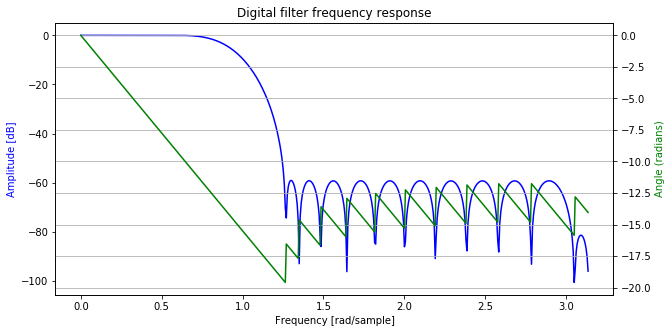

In [2]:
#NBVAL_CHECK_OUTPUT
taps = signal.remez(32, [0, 0.1, 0.2, 0.5], [1, 0])
plot_freqz(taps)

In [3]:
inp = [0.0 + 0.0j] * 512
inp[0] = 1.0 + 1.0j

dut = ComplexFIR(taps)
sims = simulate(dut, inp, simulations=['MODEL', 'PYHA'])

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)


/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6841: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


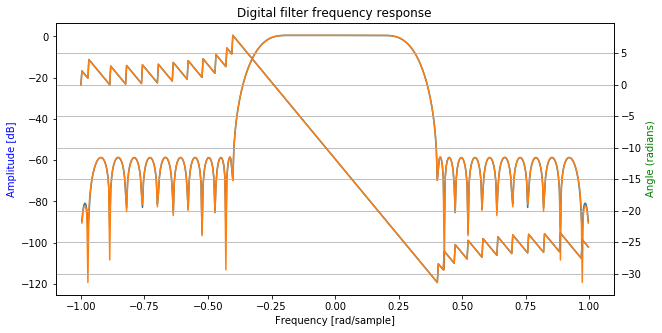

In [4]:
fig, ax1 = plt.subplots(1, 1)
plt.title('Digital filter frequency response')
ax1.magnitude_spectrum(np.array(sims['MODEL'])*(512-128), window=matplotlib.mlab.window_none, scale='dB', label='MODEL')
ax1.magnitude_spectrum(np.array(sims['PYHA'])*(512-128), window=matplotlib.mlab.window_none, scale='dB', label='PYHA')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
ax2.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
ax2.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.grid(True)
plt.legend()
plt.show()

/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6841: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


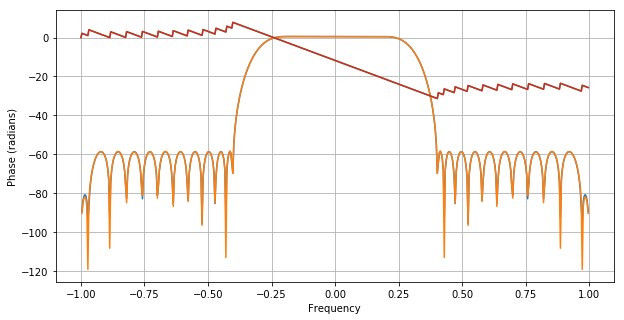

In [5]:
plt.magnitude_spectrum(np.array(sims['MODEL'])*(512-128), window=matplotlib.mlab.window_none, scale='dB')
plt.magnitude_spectrum(np.array(sims['PYHA'])*(512-128), window=matplotlib.mlab.window_none, scale='dB')

plt.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
plt.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
plt.grid(True)
# plt.show()

plt.show()

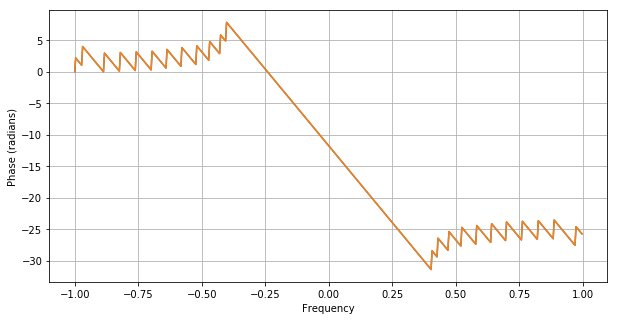

In [6]:
plt.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none)
plt.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none)
plt.grid(True)
plt.show()

In [7]:
inp = np.random.uniform(-1, 1, 1024) + np.random.uniform(-1, 1, 1024)*1j